# BIG DATA & DATA MINING - Final Project

**Judul : Penerapan Random Forest untuk Klasifikasi Binary pada dataset Pima Indians Diabetes Database**

Link dataset : [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data)



> Nama : Nur Fadhlur Rahman

> NIM : 21.11.4349

> Kelas : 21S1IF-Bigdata5







# FP fix

## Kasus:

membangun model machine learning untuk memprediksi apakah seorang pasien dalam dataset memiliki diabetes atau tidak berdasarkan pengukuran diagnostik tertentu.

## Version Python 3.x, DB Version XX

In [ ]:
# cek versi python yg digunakan
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


##Library yg dibutuhkan, version library dan link sumber library

## Import Library

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy tensorflow imbalanced-learn


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel

# Set matplotlib untuk menampilkan plot di notebook
%matplotlib inline

# Optional: Set tema seaborn (opsional)
sns.set_theme()

link library:
- [pandas](https://pandas.pydata.org/)
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [sklearn](https://scikit-learn.org/stable/)

## Load data

In [ ]:
# Load data (gantilah 'nama_file.csv' dengan nama file dataset Anda)
df = pd.read_csv('/content/drive/MyDrive/Kuliah/BDDM/FP/diabetes.csv')

# Tampilkan beberapa baris pertama data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Statistik deskriptif untuk variabel numerik
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Memeriksa missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## EDA

Text(0.5, 1.0, 'Korelasi antar Variabel Numerik')

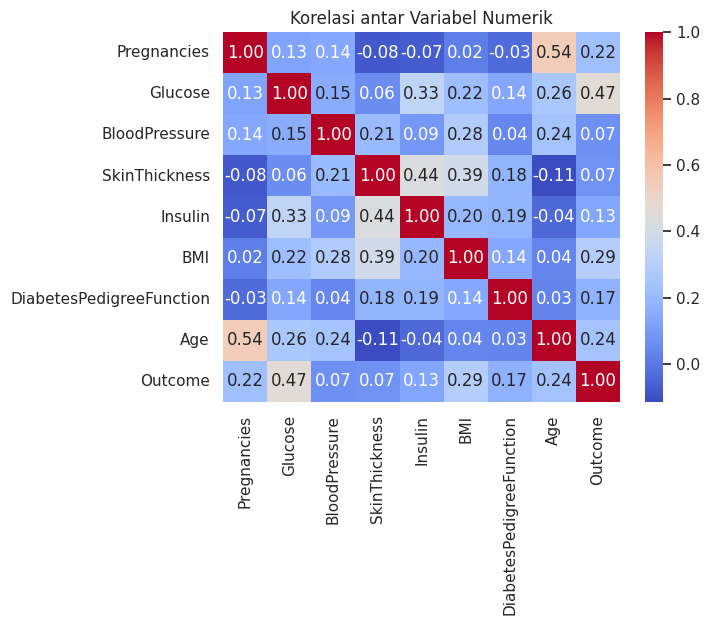

In [ ]:
# Menampilkan distribusi variabel target
sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Outcome')

# Visualisasi korelasi antar variabel numerik
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar Variabel Numerik')


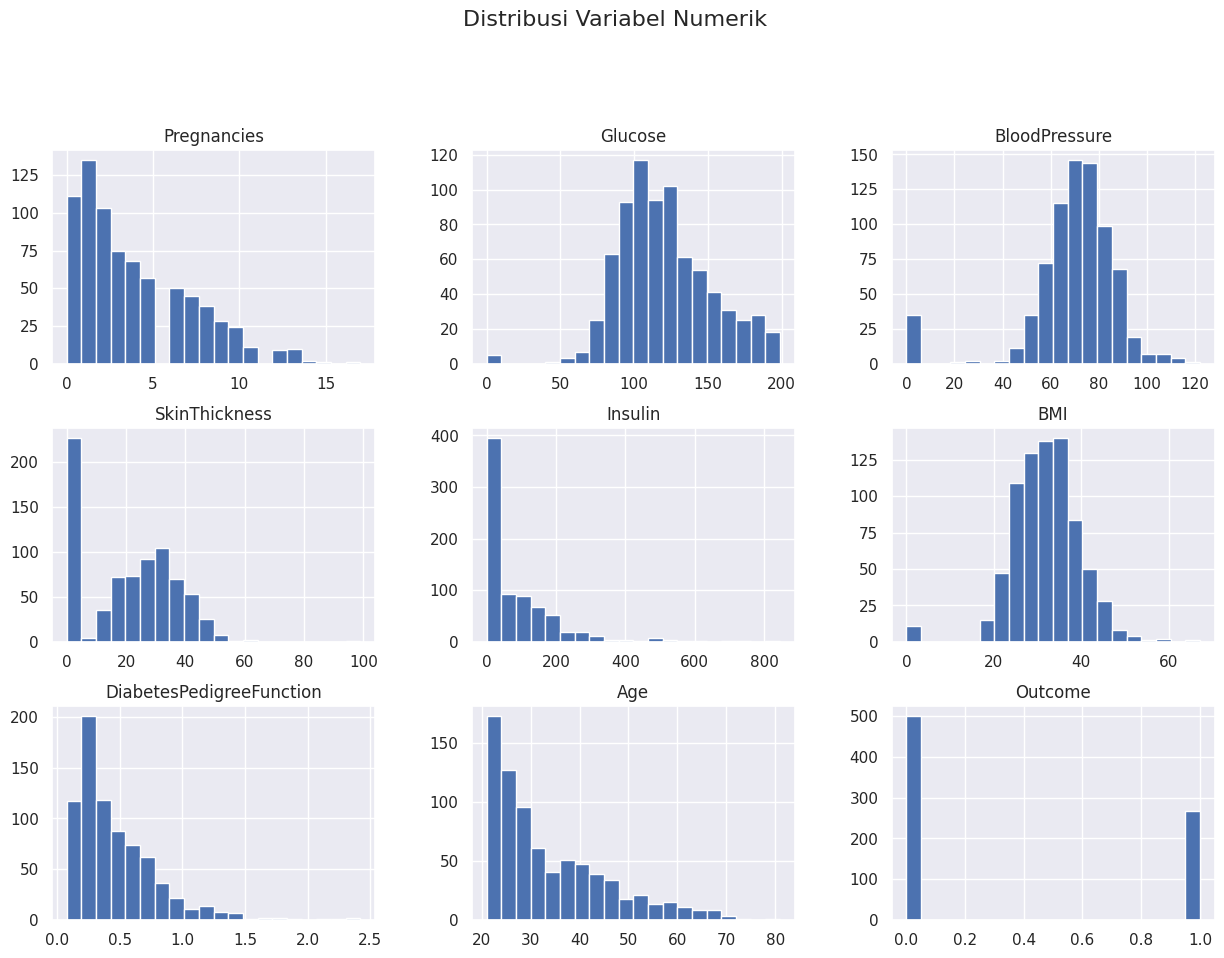

In [ ]:
# Visualisasi distribusi variabel numerik
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Variabel Numerik', y=1.02, fontsize=16)
plt.show()

## Preprocessing data (Feature selection)

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

## Spliting data

In [ ]:
# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


## Pembuatan Model

In [ ]:
# Inisialisasi model Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

## Hasil Model

In [ ]:
# Melatih model pada data pelatihan
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

In [ ]:
# Mengukur akurasi model
accuracy_rf = accuracy_score(y_pred, y_test)

In [ ]:
#  confusion matrix
cmr = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
cm_labels = [f"{label}\n{value}" for label, value in zip(labels, cmr.flatten())]
cm_labels = np.array(cm_labels).reshape(2, 2)

In [ ]:
class_report = classification_report(y_test, y_pred)

## Evaluasi Model

In [ ]:
print("Accuracy (RandomForest):", accuracy_rf)

Accuracy (RandomForest): 0.7532467532467533


In [ ]:
print('\nConfusion Matrix:')
print(cmr)


Confusion Matrix:
[[121  30]
 [ 27  53]]


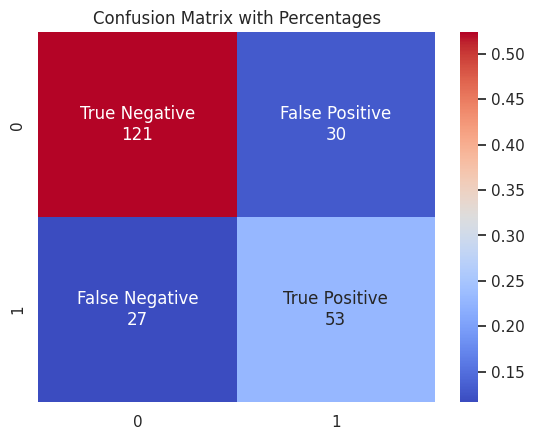

In [ ]:
# Plot confusion matrix
sns.heatmap(cmr / np.sum(cmr), annot=cm_labels, fmt='', cmap='coolwarm', annot_kws={'size': 12})
plt.title('Confusion Matrix with Percentages')
plt.show()

In [ ]:
#  meanmpilkan informasi klasifikasi
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



**Analisa :**

hasil Analisis terhadap matriks konfusi menunjukkan bahwa model memiliki presisi sebesar 82% untuk klasifikasi non-diabetes (0), dan 64% untuk klasifikasi diabetes (1). Meskipun recall memiliki perbedaan yang lebih kecil, yaitu 80% untuk non-diabetes dan 66% untuk diabetes, skor F1 yang seimbang menunjukkan kemampuan model dalam memberikan hasil yang baik untuk kedua kelas. Secara keseluruhan, model ini memberikan keseimbangan yang baik antara mengenali individu yang mengidap diabetes dan yang tidak, sejalan dengan nilai akurasi yang dicapai.
